# Exploratory Data Analysis
### Elements of structured data
- data comes from many sources.
- there are two basic types of structured data; **numeric and categorical**. 
- **numeri**c data comes in two forms: **continuous and discrete.**
- **categorical** takes only fixed set of values such as TV screen
- **binary data** is important special case of categorical data that takes only one of two values such as 0/1, yes/no or true/ false.
- categorical types is **ordinal data **: in which categories are ordered as numerical rating(1,2,3,4,5) stars.
- why data type **important**: To help determine the type of visual display, data analysis or statistical model and improve computational performance

### Key Ideas
- data is typically classified in software by type.
- data type include numeric (continuous, discrete) and categorical (binary, ordinal).
- data typing in software acts as a signal to the software on how to process the data.

### Rectangular data
- Typical frame of reference for analysis in data science is  rectangular data object, like spreadsheet or database table
- rectangular data is general term for  two-dimensional matrix with rows indicating records(cases) and columns indicating features(variables)
- columns names is data-science : column, attribute, input, predictor, variable, Field, Dimension, Independent variable, Key.
- rows names is data-science : row, record, case, example, instance, observation, pattern, sample, Tuple, Data Point, Entry.

### Nonrectangular data structures
- Time series data
- Spatial data (mapping and location)

### Estimates of location
- **estimate** of where most of the data is located i.e its central tendency.
- **Mean(average):** sum of all values divided by number of values.
- **Weighted mean**
- **Median :** One half of data lies above and below as 50th percentile.
- **Percentile:** value such that P percent of data lies below as quantile.
- **Trimmed mean:** average of all values after dropping fixed number of extreme values. as truncated mean.
- **Robust:** Not sensitive to extreme values. as resistant.
- **Outlier:** data value that is very different from most of data as extreme value

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import statsmodels.robust as robust
from statsmodels.robust.scale import mad


In [3]:

state = pd.read_csv("E:\Statistics-for-Data-Science\population_murder_rate.csv")
state

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Kamran\AppData\Local\Temp\ipykernel_11056\1139261898.py:1: SyntaxWarning: invalid escape sequence '\S'
  state = pd.read_csv("E:\Statistics-for-Data-Science\population_murder_rate.csv")


,Sr.,State,Population,Murder rate,Abbreviation
0,1,Alabama,4779736,5.7,AL
1,2,Alaska,710231,5.6,AK
2,3,Arizona,6392017,4.7,AZ
3,4,Arkansas,2915918,5.6,AR
4,5,California,37253956,4.4,CA
5,6,Colorado,5029196,2.8,co
6,7,Connecticut,3574097,2.4,CT
7,8,Delaware,897934,5.8,DE


In [4]:
print(state['Population'].mean())
print(trim_mean(state['Population'], 0.1))
print(state['Population'].median())

7694135.625
7694135.625
4176916.5


In [5]:
# weighted mean and weighted median

weight_mean = np.average(state['Murder rate'], weights=state['Population'])  
print(weight_mean)
import wquantiles 
weight_median = wquantiles.median(state['Murder rate'], weights=state['Population'])
print(weight_median)
print("In this case, weighted mean and weighted median ae about same.")

4.376359279149048
4.448750497554494
In this case, weighted mean and weighted median ae about same.


### Key ideas
- Basic metric for location is mean, but it can be sensitive to extreme values(outlier).
- other metrics (median, trimmed_mean) are less sensitive to outliers and unusual distributions and hence are more robust.

### Estimate of variability
- location is just one dimension in summarizing a feature.
- second  dimension, variability, also refered to as dispersion, measure whether data values are tightly clustered or spread out.
- At heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability.
- **Deviations:** difference between observed values and estimate of location ( errors, residuals)
- **variance:** sum of square deviation fro  mean divided by n-1 where n is number of data values( mean-squared-error).
- **standard deviation:** square root of the variance.
- **mean absolute deviation:** mean of absolute values of deviations from mean(l1-norm, manhattan norm).
- **median absolute deviation from the median:** the median of absolute values of deviations from median
- **Range:** difference between largest and smallest value in a data set.
-** order statistics: **metrics based on data values sorted from smallest to biggest(ranks).
- **percentile:** value such that P percent of values take on this value or less and (100 - P) percent take on this values or more(quantile).
- **Inter-quantile range:** difference between 75th percentile and 25th percentile(IQR).


### Degree of freedom
- if we use intuitive denominator of 'n' in the variance formula, you will underestimate true value of variance and standard deviation in population. this is referred to as a biased estimate.
- however, if we divide by 'n-1' instead of 'n', the variance becomes unbiased estimate
- For most problems, data scientists do not need worry about degree of freedom.
- the variance and standard deviation are especially sensitive to outliers since they are based on squared deviations.
- A robust estimate of variability is the median absolute deviation from the median or MAD.

In [6]:
# Simple example in sorted order
data1 = [2,3,5,3,1,6,7,9]  # firstly sorted data
data = [1,2,3,3,5,6,7,9]
print(f"mean of the data is: {np.mean(data)}")
print(f"median of the data is: {np.median(data)}")
print(f"25th percentile of the data is: {np.percentile(data, 25)}")
print(f"75th percentile of the data is: {np.percentile(data, 75)}")
print(f"Iqr is: {np.percentile(data, 75) - np.percentile(data, 25)}") # iqr = q3 - q1


mean of the data is: 4.5
median of the data is: 4.0
25th percentile of the data is: 2.75
75th percentile of the data is: 6.25
Iqr is: 3.5


### Example : variability estimates of state population

In [7]:
state

,Sr.,State,Population,Murder rate,Abbreviation
0,1,Alabama,4779736,5.7,AL
1,2,Alaska,710231,5.6,AK
2,3,Arizona,6392017,4.7,AZ
3,4,Arkansas,2915918,5.6,AR
4,5,California,37253956,4.4,CA
5,6,Colorado,5029196,2.8,co
6,7,Connecticut,3574097,2.4,CT
7,8,Delaware,897934,5.8,DE


- By pandas dataframe provides methods to calculating standard deviation and quantiles.we can easily determine IQR.
- For robust MAD, we use function `robust.scale.mad` from statsmodels package:

In [8]:
std1 = state['Population'].std()
print(f"Std: {std1}")
Iqr = state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
print(f"IQR : {Iqr}")
robust_mad = robust.scale.mad(state['Population'])
print(f"MAD : {robust_mad}")

Std: 12105745.29585633
IQR : 2958479.25
MAD : 2576836.044572552


### Key Ideas
- variance and standard deviation are most widespread and routinely reported statistics of variability.
- both are sensitive to outliers.
- More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentile(quantiles)

### Exploratory The Data Distribution
- it is also useful to explore how the data is distributed overall.
- **Boxplot:** A plot introduced by Tukey as a quick  way to visualize the distribution of data (box and whiskers plot)
- **Frequency table:** A tall of count of numeric data values that fall into a set of intervals(bins)
- **Histogram:** A plot of the frequency table with bins on x-axis and count(or proportion) on y-axis
- **Density plot:** a smoothed version of histogram, often based on a kernel density estimate

In [9]:
# Percentiles and boxplot
perc = state['Murder rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print(perc)


0.05    2.540
0.25    4.000
0.50    5.150
0.75    5.625
0.95    5.765
Name: Murder rate, dtype: float64


Text(0, 0.5, 'Population(millions)')

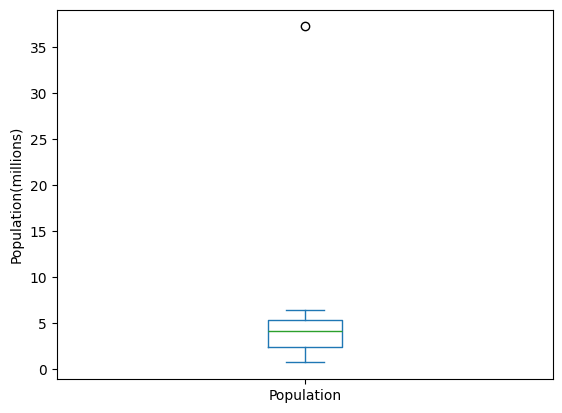

In [10]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population(millions)')

- The function pandas.cut creates a series that maps the values into segments and using method value_counts, we get frequency table.

In [11]:
binnedpopulation = pd.cut(state['Population'], 10)
binnedpopulation.value_counts()

Population
(673687.275, 4364603.5]     4
(4364603.5, 8018976.0]      3
(33599583.5, 37253956.0]    1
(8018976.0, 11673348.5]     0
(15327721.0, 18982093.5]    0
(11673348.5, 15327721.0]    0
(18982093.5, 22636466.0]    0
(22636466.0, 26290838.5]    0
(26290838.5, 29945211.0]    0
(29945211.0, 33599583.5]    0
Name: count, dtype: int64

Text(0.5, 0, 'Population(millions)')

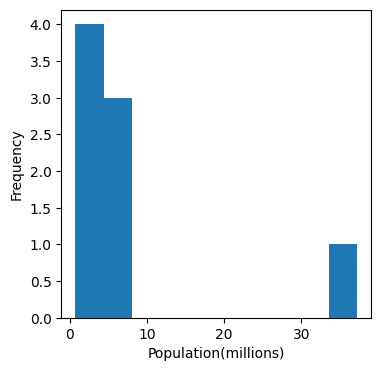

In [12]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population(millions)')

- Empty bins are included in graph.
- Bins are of equal width.
- The number if bins(or, equivalent, bin size) is up to user.
- Bars are continuous no empty space shows between bars, unless there is empty bin.

### Statistical 
- in statistical theory, LOCATION AND VARIABILITY are refered to as the first and second moments of distibution.
- The third and fourth moments are called SKEWNESS AND KURTOSIS.
- Skewness refers to whether data is skewed to larger or smaller values.
- Kurtosis indicates the propensity of the data to have extreme values.
